In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sn

In [47]:
# Read in DataSet and clean nan inputs
starOrignialDF= pd.read_csv('pulsarStarData.csv', encoding = 'utf8')
starOrignialDF.dropna()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [48]:
# Rename target column for prediction
starOrignialDF.rename(columns={'target_class': 'Pulsar_Star'}, inplace=True)
starOrignialDF

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,Pulsar_Star
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
starOrignialDF.data = starOrignialDF.drop("Pulsar_Star", axis=1)
starOrignialDF.target = starOrignialDF["Pulsar_Star"]

C:\Users\caraa\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
C:\Users\caraa\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [51]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(starOrignialDF.data, starOrignialDF.target)
rf.score(starOrignialDF.data, starOrignialDF.target)

1.0

In [52]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf.feature_importances_
importances

array([0.19393974, 0.04747046, 0.31817272, 0.21266345, 0.0809532 ,
       0.0674619 , 0.04362556, 0.03571298])

In [53]:
# We can sort the features by their importance
forestResult = sorted(zip(rf.feature_importances_, starOrignialDF), reverse=True)
forestResult

[(0.3181727151955376, ' Excess kurtosis of the integrated profile'),
 (0.21266345004131196, ' Skewness of the integrated profile'),
 (0.19393974402778238, 'Mean of the integrated profile'),
 (0.0809532018502683, ' Mean of the DM-SNR curve'),
 (0.06746189504957456, ' Standard deviation of the DM-SNR curve'),
 (0.04747045696123863, ' Standard deviation of the integrated profile'),
 (0.043625560090322466, ' Excess kurtosis of the DM-SNR curve'),
 (0.03571297678396415, ' Skewness of the DM-SNR curve')]

In [54]:
importanceRatio_DF= pd.DataFrame({
                          "Importance Rating":importances})
importanceRatio_DF

# To sort from highest to lowest, ascending=False must be passed in & resest index
descendingImportanceRatio_DF= importanceRatio_DF.sort_values("Importance Rating", ascending=False).reset_index(drop=True)
descendingImportanceRatio_DF.head(8)

,Importance Rating
0,0.318173
1,0.212663
2,0.193940
3,0.080953
4,0.067462
5,0.047470
6,0.043626
7,0.035713


In [55]:
descendingImportanceRatio_DF['Features of Importance']=""
descendingImportanceRatio_DF

,Importance Rating,Features of Importance
0,0.318173,
1,0.212663,
2,0.193940,
3,0.080953,
4,0.067462,
5,0.047470,
6,0.043626,
7,0.035713,


In [56]:
descendingFeatures= ['Excess kurtosis of the integrated profile',' Skewness of the integrated profile',
                     'Mean of the integrated profile',' Mean of the DM-SNR curve',
                     ' Standard deviation of the DM-SNR curve',' Standard deviation of the integrated profile',
                     ' Skewness of the DM-SNR curve',' Excess kurtosis of the DM-SNR curve']

In [57]:
decendingRating= descendingImportanceRatio_DF['Importance Rating']
decendingRating.head(3)

0    0.318173
1    0.212663
2    0.193940
Name: Importance Rating, dtype: float64

In [58]:
# intialise data of lists. 
data = {"Prediction_Importance_Feature":descendingFeatures,
        'Importance_Rating':decendingRating} 
  
# Create DataFrame 
print('               Importance Features')
print('           __________________________')

finalImportance_df= pd.DataFrame(data) 
finalImportance_df

               Importance Features
           __________________________


,Prediction_Importance_Feature,Importance_Rating
0,Excess kurtosis of the integrated profile,0.318173
1,Skewness of the integrated profile,0.212663
2,Mean of the integrated profile,0.193940
3,Mean of the DM-SNR curve,0.080953
4,Standard deviation of the DM-SNR curve,0.067462
5,Standard deviation of the integrated profile,0.047470
6,Skewness of the DM-SNR curve,0.043626
7,Excess kurtosis of the DM-SNR curve,0.035713


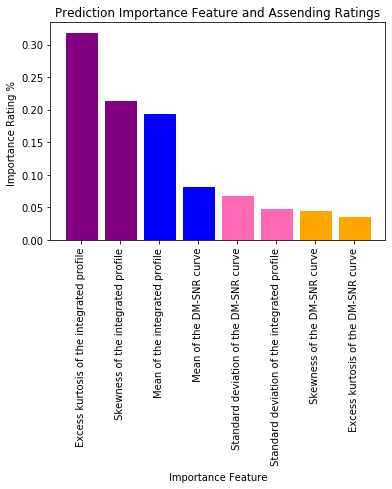

In [59]:
# Bar Plots
X_axis = finalImportance_df['Prediction_Importance_Feature']
y_axis = finalImportance_df['Importance_Rating']

barList = plt.bar(X_axis,y_axis)
#colors 
barList[0].set_color('purple')
barList[1].set_color('purple')
barList[2].set_color('blue')
barList[3].set_color('blue')
barList[4].set_color('hotpink')
barList[5].set_color('hotpink')
barList[6].set_color('orange')
barList[7].set_color('orange')
# Orient widths. Add labels, tick marks, etc. 
plt.title("Prediction Importance Feature and Assending Ratings")
plt.ylabel("Importance Rating % ")
plt.xlabel("Importance Feature")
plt.xticks(np.arange(0,8,1))
plt.xticks(rotation=90)

# Show the Figure
plt.show()

In [60]:
# To sort from lowest to highest for adjusting horizontal barchart, ascending=True must be passed in & resest index 
newImportance_df= finalImportance_df.sort_values("Importance_Rating", ascending=True).reset_index(drop=True)
newImportance_df.head(8)

,Prediction_Importance_Feature,Importance_Rating
0,Excess kurtosis of the DM-SNR curve,0.035713
1,Skewness of the DM-SNR curve,0.043626
2,Standard deviation of the integrated profile,0.047470
3,Standard deviation of the DM-SNR curve,0.067462
4,Mean of the DM-SNR curve,0.080953
5,Mean of the integrated profile,0.193940
6,Skewness of the integrated profile,0.212663
7,Excess kurtosis of the integrated profile,0.318173


Text(0.5, 1.0, 'Prediction Importance Feature and Assending Ratings')

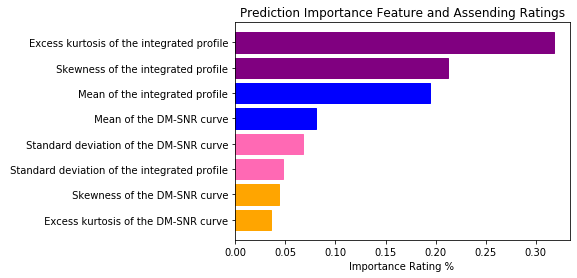

In [61]:
X_axis = newImportance_df['Prediction_Importance_Feature']
y_axis = newImportance_df['Importance_Rating']
barList = plt.barh(X_axis, y_axis)
#colors 
barList[0].set_color('orange')
barList[1].set_color('orange')
barList[2].set_color('hotpink')
barList[3].set_color('hotpink')
barList[4].set_color('blue')
barList[5].set_color('blue')
barList[6].set_color('purple')
barList[7].set_color('purple')



plt.xlabel("Importance Rating % ")
plt.title("Prediction Importance Feature and Assending Ratings")

In [101]:
d= starOrignialDF["Pulsar_Star"].astype(str)
d

0        0
1        0
2        0
3        0
4        0
        ..
17893    0
17894    0
17895    0
17896    0
17897    0
Name: Pulsar_Star, Length: 17898, dtype: object

In [109]:
# Assign the data to X and y

X =starOrignialDF.drop("Pulsar_Star", axis=1)
y = starOrignialDF["Pulsar_Star"]
print(X.shape, y.shape)

(17898, 8) (17898,)


In [111]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [112]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [113]:
y_test

13381    0
4382     1
12059    0
8470     0
2874     0
        ..
16050    0
6868     0
15654    0
9251     0
1622     0
Name: Pulsar_Star, Length: 4475, dtype: int64

In [114]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.9796648044692737


In [115]:
print(f"DEFAULT OUTCOME KEY: (Pulsar YES: 1 , Pulsar NO: 0 )")
print(f"------------------------------------------------------")
print(f"Predicted Outcome: {y_pred}")
print(f"Actual Outcome: {list(y_test[:])}")

DEFAULT OUTCOME KEY: (Pulsar YES: 1 , Pulsar NO: 0 )
------------------------------------------------------
Predicted Outcome: [0 1 0 ... 0 0 0]
Actual Outcome: [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0

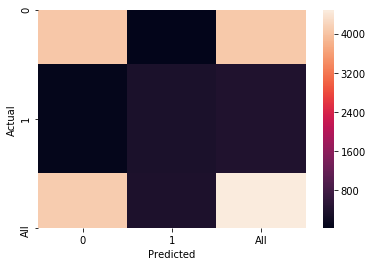

In [120]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins = True)
sn.heatmap(confusion_matrix, annot=False)

In [123]:
confusion_matrix.describe()

Predicted,0,1,All
count,3.000000,3.000000,3.000000
mean,2738.666667,244.666667,2983.333333
std,2316.550309,188.987654,2242.883040
min,64.000000,27.000000,404.000000
25%,2054.000000,183.500000,2237.500000
50%,4044.000000,340.000000,4071.000000
75%,4076.000000,353.500000,4273.000000
max,4108.000000,367.000000,4475.000000
